In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [2]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

Type                           Make_Model  Combined_LP100km
0  Two Seaters                            Acura_NSX         11.200694
1  Two Seaters                        ALFA ROMEO_4C          8.418380
2  Two Seaters  Aston Martin Lagonda Ltd_Vantage V8         11.229839
3  Two Seaters             Audi_TT Roadster quattro          9.048385
4  Two Seaters                     BMW_Z4 sDrive30i          8.513014


The mean Liters per 100km of all vehicles is: 10.67
The standard deviation of all vehicle's L/100km is: 2.47


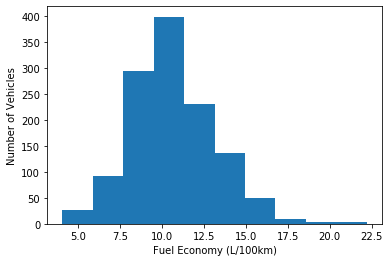

In [3]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean Liters per 100km of all vehicles is: {round(fuel_economy.Combined_LP100km.mean(),2)}")
print(f"The standard deviation of all vehicle's L/100km is: {round(fuel_economy.Combined_LP100km.std(),2)}")
plt.hist(fuel_economy.Combined_LP100km)
plt.xlabel("Fuel Economy (L/100km)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean L/100km of all vehicles is: 12.95
The standard deviation of all vehicle's L/100km  is: 1.74


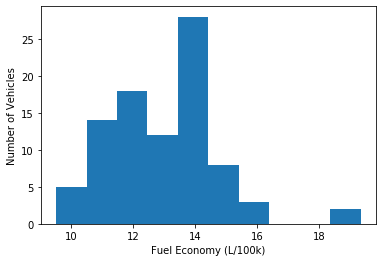

In [4]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean L/100km of all vehicles is: {round(subset.Combined_LP100km.mean(),2)}")
print(f"The standard deviation of all vehicle's L/100km  is: {round(subset.Combined_LP100km.std(),2)}")
plt.hist(subset.Combined_LP100km)
plt.xlabel("Fuel Economy (L/100k)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean L/100km of all vehicles is: 10.59
The standard deviation of all vehicle's L/100km  is: 2.44


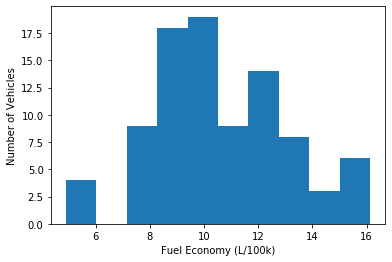

In [5]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean L/100km of all vehicles is: {round(subset.Combined_LP100km.mean(),2)}")
print(f"The standard deviation of all vehicle's L/100km  is: {round(subset.Combined_LP100km.std(),2)}")
plt.hist(subset.Combined_LP100km)
plt.xlabel("Fuel Economy (L/100k)")
plt.ylabel("Number of Vehicles")
plt.show()

In [6]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_LP100km)}")

The SEM value for the sample fuel economy data is 0.3629167721791536


In [7]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]

In [8]:
# Generate the plot data for each sample 
means = [sample.Combined_LP100km.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_LP100km) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

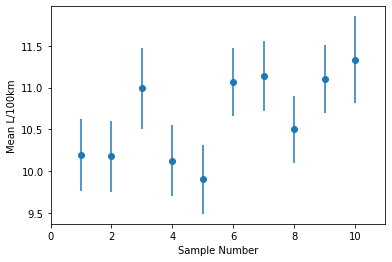

In [9]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean L/100km")
plt.show()